In [1]:
import matplotlib.pyplot as plt

In [2]:
def generate_points(sequence):
    points = [(i, sequence[i-1]) for i in range(1, len(sequence) + 1)]
    return points

In [3]:
def plot_lattice(points, shaded_points):
    # Extract the number of dimensions (n) from the first point
    n = len(points[0])

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Draw the axes lines through (0, 0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Remove ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Highlight the lattice points
    for index, point in enumerate(points):
        ax.plot(*point, 'bo', markersize=8)  # 'bo' stands for blue circle marker
        ax.annotate(f'({", ".join(str(coord) for coord in point)})', (point[0] + 0.1, point[1] + 0.1))
        
    # Shade the specified points
    for point in shaded_points:
        square_points = [(point[0], point[1]), (point[0], point[1] - 1), (point[0] - 1, point[1] - 1), (point[0] - 1, point[1])]
        x_coords, y_coords = zip(*square_points)
        ax.fill(x_coords, y_coords, alpha=0.5, color='gray')

    # Set plot limits and aspect ratio for a square lattice
    max_val = max(max(p) for p in points) + 0.5
    ax.set_xlim(-0.5, 4.5)  # Adjust the limits as per your needs
    ax.set_ylim(-0.5, 4.5)
    ax.set_aspect('equal')

    # Remove axis labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Show the plot
    plt.grid(True)
    plt.show()
    
    return fig, ax

* Doesn't show patches correctly. Make sure to change it so it does. 
* Create a few test param files and run the solver, 
* Create the algorithm that actually makes this happen.

For today, just make the param files and test it out, you can do the programming later anyway. This is more important. 

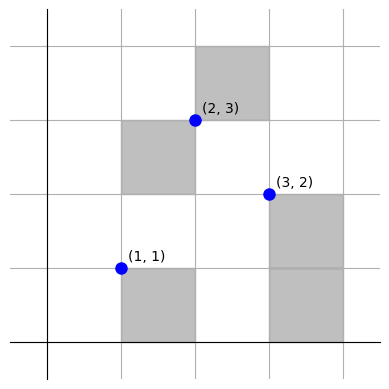

In [4]:
# Example usage:
sequence = [1, 3, 2]  # Replace this with your desired sequence of non-repeating integers between 1 and n
lattice_points = generate_points(sequence)
shaded_points = [(2,1),(2,3),(3,4),(4,1),(4,2)]  # Replace this with the points you want to shade
fig, ax = plot_lattice(lattice_points, shaded_points)

plt.show()  # To display the final plot

```json
language Essence 1.3

letting length be 4
$letting avoiding be { ( sequence(1,2,3), relation((1,1)) ) } $ should only be 10 contain, 14 avoid (but that is because the
permutation is avoided)

$ finally the pattern in the Bruner&Lackner paper was
letting mesh_avoidance be { ( sequence(1,3,2), relation((1,0),(1,2),(2,3),(3,0),(3,1)) ) } $ of length 4; 8 will contain the mesh pattern, 14 will avoid the permutation + 2 will contain the permutation but violate the mesh

$ 16 Solution for avoidance should be
$ Avoiding pattern
$ 1234, 2134, 2314 ,2341, 3124, 3214, 3241, 3412, 3421, 4123, 4213, 4231, 4312, 4321

$ Contains pattern but breaks mesh
$ 1342, 2431
```

*Good sequence*

```json
language Essence 1.3

$Length of pattern
letting length be 4

$ seqeunce is the permuatation pattern, the relation is the avoidance, change that relation to something else. 
letting mesh_avoidance be { ( sequence(1,3,2), relation((1,0),(1,2),(2,3),(3,0),(3,1)) ) } $ of length 4; 8 will contain the mesh pattern, 14 will avoid the permutation + 2 will contain the permutation but violate the mesh
```

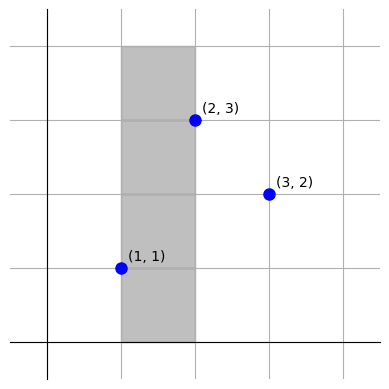

[(2, 1), (2, 2), (2, 3), (2, 4)]


In [5]:
# Function for vincular mesh
def vincularMesh (index, length):
    sequence = []
    for i in range(1,length + 1):
        sequence.append((index + 1,i))
    return sequence

sequence = [1,3,2]
lattice_points = generate_points(sequence)
# shaded_points = [(2,1),(2,3),(2,2),(2,4)]  # index {1}
shaded_points = vincularMesh(1,4)
fig, ax = plot_lattice(lattice_points, shaded_points)

plt.show()  # To display the final plot
print(vincularMesh(1,4))

```json
language Essence 1.3

$ vincular mesh param file

$ pattern in paper, picture above
letting mesh_avoidance be { ( sequence(1,3,2), relation( (2, 1), (2, 2), (2, 3), (2, 4) ) } 

$ n Solution for avoidance should be:
$ Avoiding pattern
$ test

$ Contains pattern but breaks mesh
$ test
```

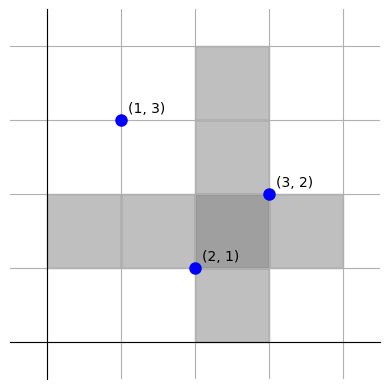

[(3, 1), (1, 2), (3, 2), (2, 2), (3, 3), (3, 2), (3, 4), (4, 2)]


In [6]:
# Function for bivincular mesh
def biVincularMesh (index, length):
    sequence = []
    for i in range(1,length + 1):
        sequence.append((index + 1,i))
        sequence.append((i, index))
    return sequence


sequence = [3,1,2]
lattice_points = generate_points(sequence)
# shaded_points = [(3,1),(3,3),(3,2),(3,4)] + [(1,2), (2,2), (3,2), (4,2)]  # index {2}
shaded_points = biVincularMesh(2,4)
fig, ax = plot_lattice(lattice_points, shaded_points)

plt.show()  # To display the final plot
print(biVincularMesh(2,4))


```json
language Essence 1.3

$ bivincular mesh param file

$ pattern in paper, picture above
letting mesh_avoidance be { ( sequence(1,3,2), relation( (3, 1), (1, 2), (3, 2), (2, 2), (3, 3), (3, 2), (3, 4), (4, 2) ) } 

$ n Solution for avoidance should be:
$ Avoiding pattern
$ test

$ Contains pattern but breaks mesh
$ test
```

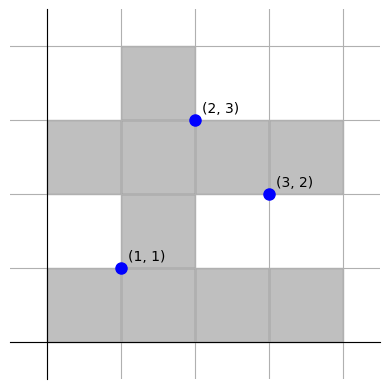

In [7]:
# letting mesh_avoidance be {(sequence(1,3,2), relation((0,0),(1,0),(2,0),(3,0),(1,1),(1,2),(1,3),(0,2),(2,2),(3,2)))}
# letting correct_bivincular_containment be {(sequence(1,3,2), {1}, {0,2})}

sequence = [1,3,2]
lattice_points = generate_points(sequence)
shaded_points = [(1,1),(2,1),(3,1),(4,1),(2,2),(2,3),(2,4),(1,3),(3,3),(4,3)]
fig, ax = plot_lattice(lattice_points, shaded_points)

plt.show()  # To display the final plot

```json
language Essence 1.3

$ combined mesh and bivincular pattern

$ vincular part: [1], mesh pieces: relation( (3,2) )
letting length be 4
letting vincular_avoidance be {(sequence(1,3,2), relation( (3,2) ), {1})}

```

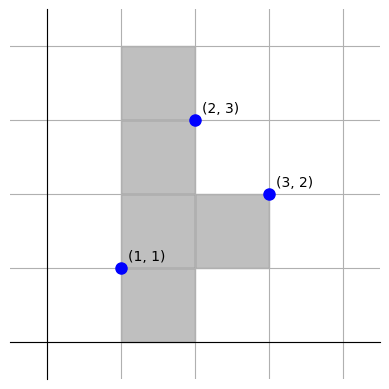

[(2, 1), (2, 2), (2, 3), (2, 4), (3, 2)]


In [8]:
sequence = [1,3,2]
lattice_points = generate_points(sequence)
shaded_points = vincularMesh(1,4) + [(3,2)]
fig, ax = plot_lattice(lattice_points, shaded_points)

plt.show()  # To display the final plot
print (shaded_points)

***Mixed Avoidance Model***

```json
$ This of mixed patterns to avoid
given mesh_avoidance : set of (sequence(injective) of int, relation of (int * int), set of int)

$ The permutation we are searching for (1..length is the permutation)
given length : int
find perm : sequence (size length, injective) of int(1..length)


$ creating a padded version of perm, where position 0 contains the value 0 and position length+1 contains the value length+1
$ this is only used for mesh avoidance/containment
find permPadded : matrix indexed by [int(0..length+1)] of int(0..length+1)
such that permPadded[0] = 0, permPadded[length+1] = length+1
such that forAll i : int(1..length) . perm(i) = permPadded[i]

such that
    $ pattern is the pattern, mesh is the mesh as a relation
    forAll (pattern, mesh, bars) in mixed_avoidance .
    $ Build the inverse of 'pattern'. This is completely evaluated before solving.
    exists patterninv: matrix indexed by [int(0..|pattern|+1)] of int(0..|pattern|+1),
                patterninv[0] = 0 /\ patterninv[|pattern|+1] = |pattern|+1 /\
                (forAll i: int(1..|pattern|) . patterninv[pattern(i)] = i).
        $ Look for all places where the pattern can occur
        forAll ix : matrix indexed by [int(0..|pattern|+1)] of int(0..length+1),
            and([ ix[0]=0
                , ix[|pattern|+1]=length+1
                , forAll i : int(0..|pattern|) . ix[i] < ix[i+1]
                , forAll n1, n2 : int(1..|pattern|) , n1 < n2 .
                    pattern(n1) < pattern(n2) <-> permPadded[ix[n1]] < permPadded[ix[n2]]
                ]) .
            $ Mesh pieces
            (
                $ If we find the pattern, make sure there is at least one value in some cell of the mesh
                exists (i,j) in mesh.
                    exists z: int(ix[i]+1..ix[i+1]-1). (permPadded[ix[patterninv[j]]] <= permPadded[z] /\ permPadded[z] <= permPadded[ix[patterninv[j+1]]])
            ) \/
            $ Vincular pieces
            !(forAll bar in bars . ix[bar] + 1 = ix[bar+1])

```